In [3]:
#  For sting e changes I made in python files

In [4]:
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from IceCube_extraction import Icecube_data
import numpy as np
import matplotlib.pyplot as plt

In [5]:
config["general"]["detector"]="IceCube"

In [6]:
#b=background(Aeff,DM2Nu,Atm_Shower)

In [7]:
x= Icecube_data(Aeff, DM2Nu, Atm_Shower)

In [8]:
surface_flux_dic = x.surface_fluxes

In [11]:
counts_unsmeared_atmos, counts_unsmeared_astro, m_egrid = x.effective_area_func(x.surface_fluxes, 9)

In [15]:
smearing_example = x.smearing_function(1e6, 5, 9)
smearing_example

(array([1.995, 2.324, 2.652, 2.981, 3.309, 3.638, 3.966, 4.295, 4.623,
        4.952, 5.28 , 5.609, 5.937, 6.266, 6.595, 6.923, 7.252, 7.58 ,
        7.909, 8.237]),
 array([0.00032751, 0.00360263, 0.03013124, 0.07893109, 0.09039403,
        0.11102728, 0.11233721, 0.13100564, 0.14639941, 0.16441199,
        0.20404043, 0.22500028, 0.25710003, 0.25677197, 0.27937066,
        0.30295042, 0.3144147 , 0.24138018, 0.0890838 , 0.01048037]))

In [16]:
test = x.sim2dec(surface_flux_dic, 9)

  0%|          | 0/91 [00:00<?, ?it/s]

Here


 20%|█▉        | 18/91 [00:52<03:33,  2.93s/it]


KeyboardInterrupt: 

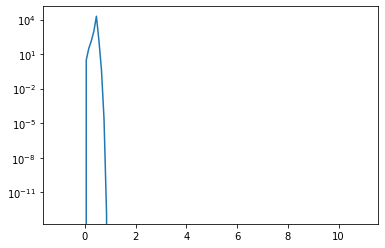

In [ ]:
plt.plot(np.log10(x._egrid),x.sim2dec[0][70])
plt.yscale("log")